In [1]:
# Í∏∞Î≥∏
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Í≤ΩÍ≥† Îú®ÏßÄ ÏïäÍ≤å ÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
sns.set()

# Í∑∏ÎûòÌîÑ Í∏∞Î≥∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ÏïåÍ≥†Î¶¨Ï¶ò
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ÌïôÏäµÏö©Í≥º Í≤ÄÏ¶ùÏö©ÏúºÎ°ú ÎÇòÎàÑÎäî Ìï®Ïàò
from sklearn.model_selection import train_test_split

# ÍµêÏ∞® Í≤ÄÏ¶ù
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# ÌèâÍ∞ÄÌï®Ïàò
# Î∂ÑÎ•òÏö©
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# ÌöåÍ∑ÄÏö©
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Î™®Îç∏Ïùò ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÍ∏∞ ÏúÑÌïú ÎèÑÍµ¨
from sklearn.model_selection import GridSearchCV

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - Î∂ÑÎ•ò
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Î®∏Ïã†Îü¨Îãù ÏïåÍ≥†Î¶¨Ï¶ò - ÌöåÍ∑Ä
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# ÌïôÏäµ Î™®Îç∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import pickle

In [2]:
# 7. ÎßàÏºÄÌåÖÏ†ïÎ≥¥
features_marketing = [
    'Ï∫†ÌéòÏù∏Ï†ëÏ¥âÍ±¥Ïàò_R12M', 'Ï∫†ÌéòÏù∏Ï†ëÏ¥âÏùºÏàò_R12M',
    'Ïª®ÌÉùÍ±¥Ïàò_Î≥¥Ìóò_TM_R6M', 'Ïª®ÌÉùÍ±¥Ïàò_Î∂ÄÎåÄÏÑúÎπÑÏä§_TM_R6M', 'Ïª®ÌÉùÍ±¥Ïàò_Ïã†Ïö©Î∞úÍ∏â_TM_R6M',
    'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_EM_B0M', 'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_EM_R6M', 'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_LMS_R6M',
    'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_TM_B0M', 'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_TM_R6M',
    'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ïù∏ÌÑ∞ÎÑ∑_B0M', 'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ïù∏ÌÑ∞ÎÑ∑_R6M',
    'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ï≤≠Íµ¨ÏÑú_B0M', 'Ïª®ÌÉùÍ±¥Ïàò_Ïù¥Ïö©Ïú†ÎèÑ_Ï≤≠Íµ¨ÏÑú_R6M'
]

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import os
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_parquet("C:/Users/KING/Desktop/workspace/11_ÌååÏù¥ÎÑêÌîÑÎ°úÏ†ùÌä∏Í¥ÄÎ†®/ÌåÄ ÌååÏùº/data/ÌÜµÌï©_train_Îç∞Ïù¥ÌÑ∞.parquet")

# 2. ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü Î∂ÑÎ¶¨
X = df[features_marketing].copy()
y = df["Segment"]

# 3. Î≤îÏ£ºÌòï Ïù∏ÏΩîÎî©
cat_cols = X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 4. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 5. Ïä§ÏºÄÏùºÎßÅ (DataFrame ÌòïÌÉú Ïú†ÏßÄ)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 6. ÎùºÎ≤® Ïù∏ÏΩîÎî©
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 7. train-validation Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 8. XGBoost Î™®Îç∏ ÏÑ†Ïñ∏ (GPU Í∞ÄÏÜç)
xgb_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 9. ÌïôÏäµ
xgb_model.fit(X_train, y_train)

# 10. ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = xgb_model.predict(X_val)

# F1-micro score Í≥ÑÏÇ∞
from sklearn.metrics import f1_score
# F1-micro score Ï∂úÎ†•
f1_micro = f1_score(y_val, y_pred, average='micro')
print("üìå F1-micro score:", round(f1_micro, 4))

# Ï†ÑÏ≤¥ Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ Ï∂úÎ†•
print("\nüìã Classification Report:")
print(classification_report(y_val, y_pred, target_names=le_y.classes_))

üìå F1-micro score: 0.8032

üìã Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       194
           B       0.00      0.00      0.00        29
           C       0.43      0.03      0.06     25518
           D       0.44      0.05      0.09     69848
           E       0.81      0.99      0.89    384411

    accuracy                           0.80    480000
   macro avg       0.34      0.21      0.21    480000
weighted avg       0.74      0.80      0.73    480000



 99%|===================| 1490/1500 [00:54<00:00]        

üîç SHAP beeswarm plot for Segment A


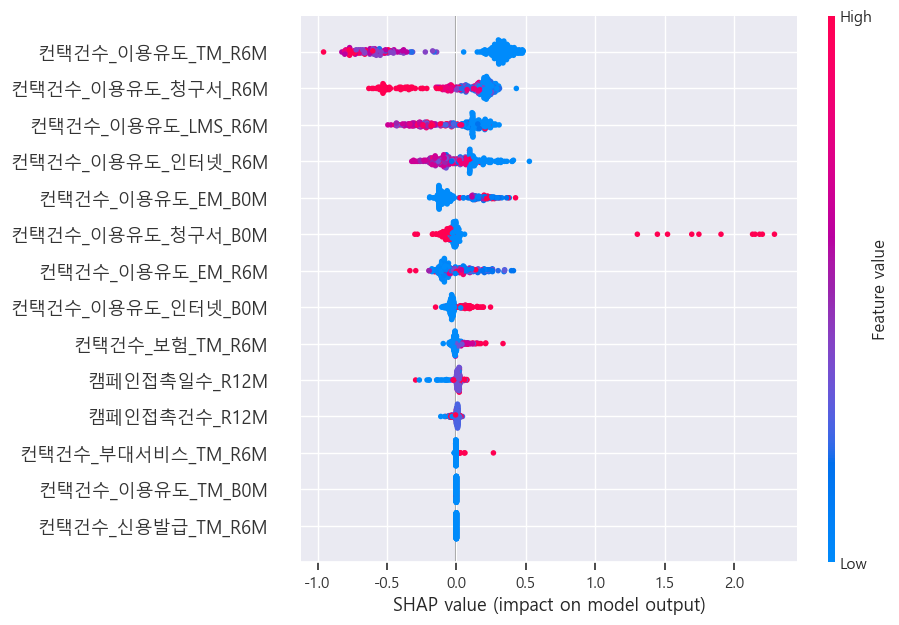

üîç SHAP beeswarm plot for Segment B


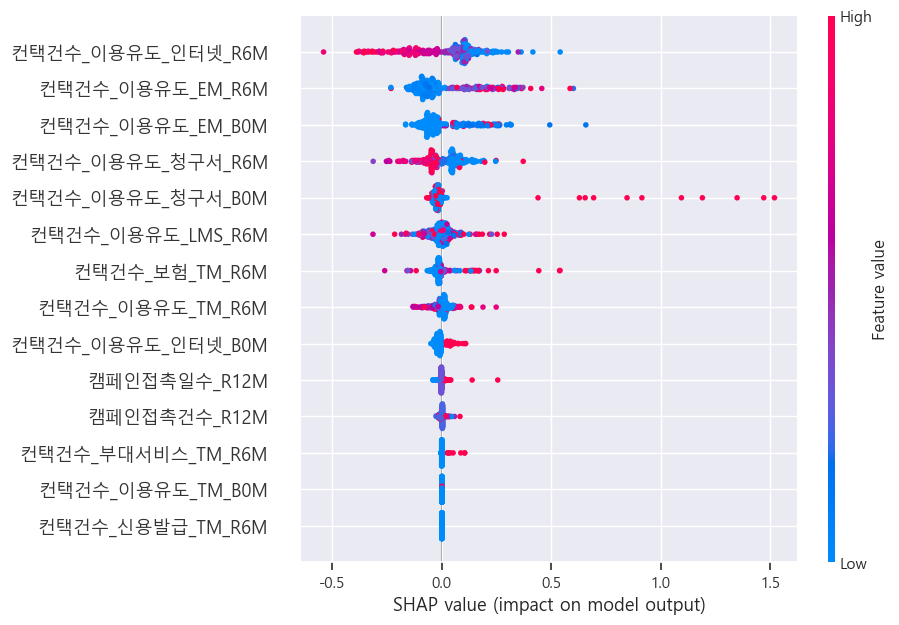

üîç SHAP beeswarm plot for Segment C


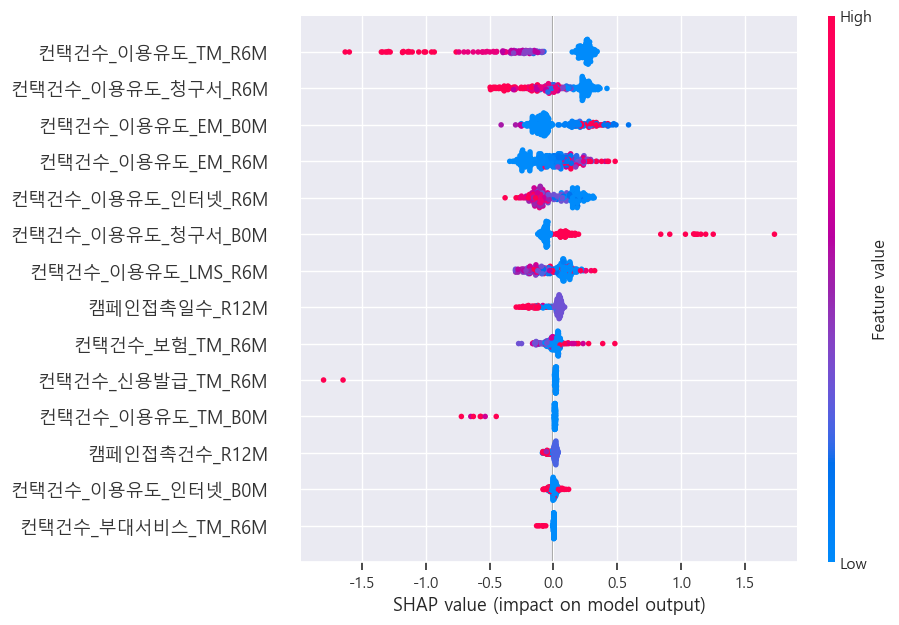

üîç SHAP beeswarm plot for Segment D


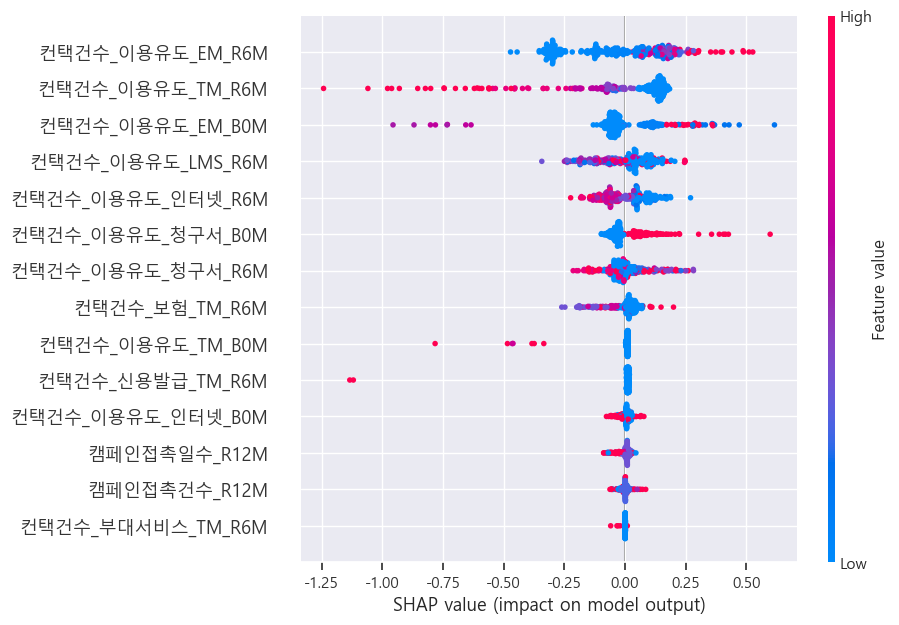

üîç SHAP beeswarm plot for Segment E


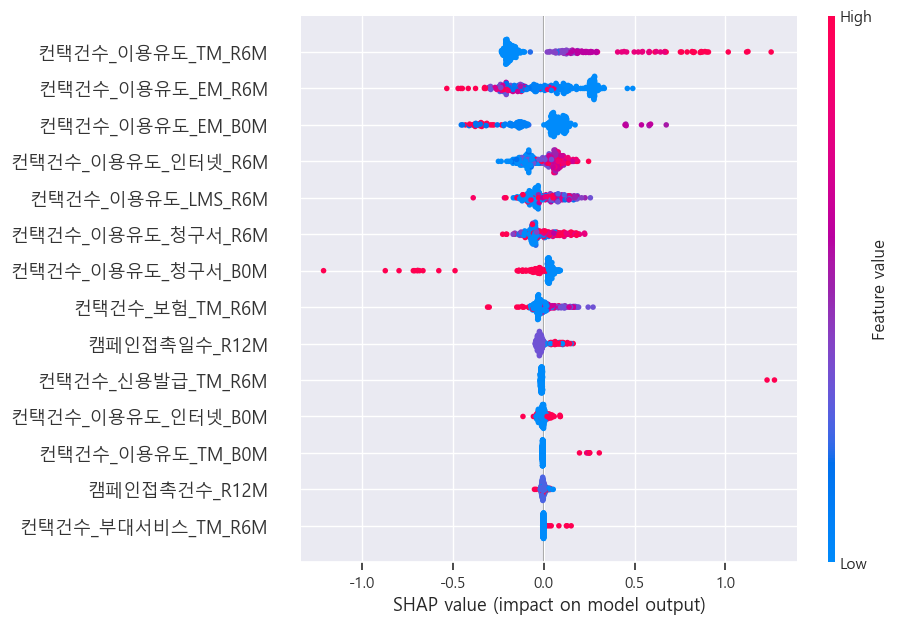

In [5]:
import shap  
import pandas as pd

# 1. ÌîºÏ≤ò Ïù¥Î¶Ñ ÏûàÎäî DataFrame Ï§ÄÎπÑ
X_val_df = pd.DataFrame(X_val, columns=features_marketing)

# 2. Ï†ÑÏ≤¥ ÏÉòÌîåÏóêÏÑú 300Í∞úÎßå ÏÉòÌîåÎßÅ (ÏÜçÎèÑ Î¨∏Ï†ú Î∞©ÏßÄ)
X_sample = X_val_df.sample(n=min(300, len(X_val_df)), random_state=42)

# 3. SHAP Explainer ÏÉùÏÑ± Î∞è Í≥ÑÏÇ∞
explainer = shap.Explainer(xgb_model, X_sample)
shap_values = explainer(X_sample)

# 4. Segment 0~4 Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ beeswarm plot Ï∂úÎ†•
for i, class_label in enumerate(['A', 'B', 'C', 'D', 'E']):
    print(f"üîç SHAP beeswarm plot for Segment {class_label}")
    shap.plots.beeswarm(shap_values[:, :, i], max_display=20)


<Figure size 1000x600 with 0 Axes>

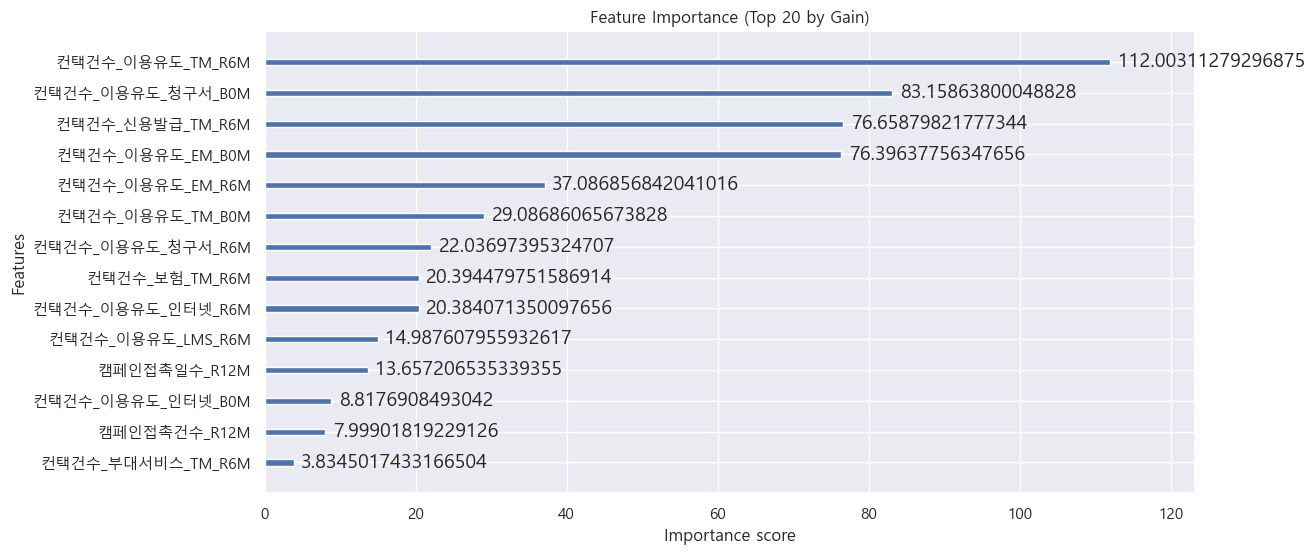

In [6]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title("Feature Importance (Top 20 by Gain)")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_val, y_pred)

# ÏãúÍ∞ÅÌôî
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("üìä Confusion Matrix")
plt.show()